In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [2]:
# Read myopia.csv into a Pandas DataFrame
myopia_df = pd.read_csv("myopia.csv")
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Store the data for the patients' Myopic results in a variable before dropping from the DataFrame
myopic_column = myopia_df['MYOPIC']
# myopic_column

In [4]:
# Remove the "MYOPIC" column from the dataset
myopia_df.drop(columns='MYOPIC', inplace=True)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Standardize your dataset with StandarScaler so that columns that contain larger values do not influence the outcome more than columns with smaller values
myopia_scaled = StandardScaler().fit_transform(myopia_df)
# print(myopia_scaled[0:618])

### Part 2: Apply Dimensionality Reduction

In [6]:
"""Perform dimensionality reduction with PCA"""

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)
# print(myopia_pca[0:618])
myopia_pca.shape

(618, 10)

<p>

- The number of features dropped from 14 columns down to 10 columns after performing the Principal Component Analysis

</p>

In [7]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=[
        "principal component 1",
        "principal component 2",
        "principal component 3",
        "principal component 4",
        "principal component 5",
        "principal component 6",
        "principal component 7",
        "principal component 8",
        "principal component 9",
        "principal component 10"
    ]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [8]:
"""Further reduce the dataset dimensions with t-SNE and visually inspect the results"""

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [9]:
# Further reduce dimensions and inspect the results
tsne_features = tsne.fit_transform(df_myopia_pca)

tsne_features.shape

c:\Users\paulb\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

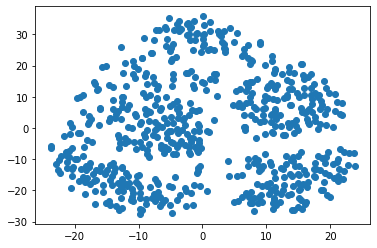

In [10]:
# Prepare to plot the dataset

# The first column of transformed features
# df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
# df_myopia_pca['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

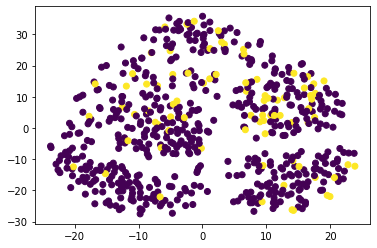

In [11]:
# Visualize the clusters with color
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=myopic_column)
plt.show()

<p>

- After reducing the dimensions down to 10 using PCA and using t-SNE to give each data point a location in a two-dimensional map there does not appear to be any distinct clusters based on our data.

</p>

### Part 3: Perform a Cluster Analysis with K-means

c:\Users\paulb\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


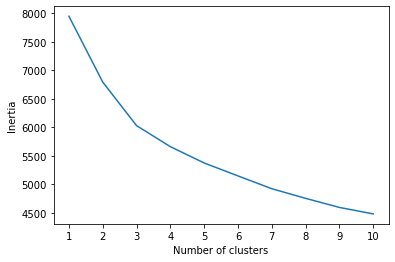

In [12]:
"""Create an elbow plot to identify the best number of clusters"""

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Identify the best number of clusters using the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


<p>It appears that the elbow of the plot is at k=3</p>

In [14]:
"""Predicting clusters with k=3"""

# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)
# print(predictions)

# Create return DataFrame with predicted clusters
df_myopia_pca["class"] = model.labels_

df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


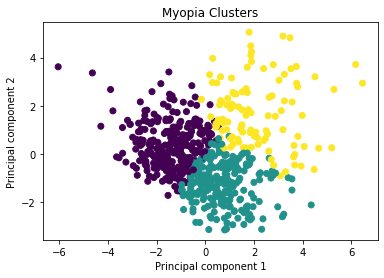

In [15]:
# Visualize the clusters
plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia Clusters')
plt.show()

In [16]:
# Plot the clusters for each Prinicpal Component visualized against the other Prinicpal Components
# for i in range(1, 11):
#     for j in range(i+1, 11):
#         if (i != j):
#             plt.scatter(df_myopia_pca[f'principal component {i}'], df_myopia_pca[f'principal component {j}'], c=df_myopia_pca['class'])
#             plt.xlabel(f'Principal component {i}')
#             plt.ylabel(f'Principal component {j}')
#             plt.title('Myopia Clusters')
#             plt.show()

### Part 4: Make a Recommendation

<p>

- Using Principal Component Analysis and K-Means we can see that there appears to be 3 distinct clusters. These clusters represent certain characteristics that are better at determining whether or not a patient has Myopia. This data could be very useful for doctors to know to better help determine if their patients have or could be at risk of developing Myopia (nearsightedness).

</p>